In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Titanic csv file

In [2]:
titanic = pd.read_csv('C:\\Users\\HP\\Desktop\\Gokila\\Data Cleaning\\titanic.csv')
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Step 1: Finding and Filling the missing values

In [32]:
titanic.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
male      0
Q         0
S         0
dtype: int64

### To see Missing Values Graphically


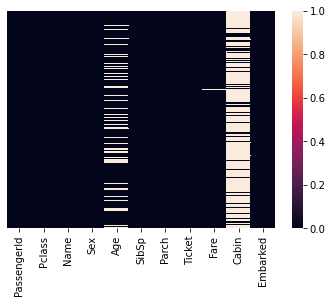

In [4]:
sns.heatmap(titanic.isnull(),yticklabels=False);

In [5]:
titanic.drop('Cabin',axis=1,inplace=True)
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [6]:
mean_age = titanic.groupby('Pclass').mean()['Age']

In [7]:
mean_age

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64

In [8]:
#Ready to fill the missing values in Age:

In [9]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 41
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [10]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

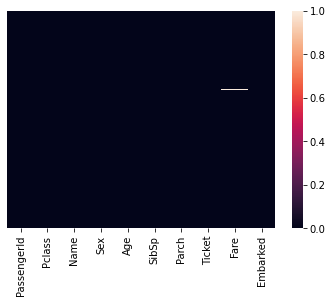

In [11]:
sns.heatmap(titanic.isnull(),yticklabels=False);

In [12]:
titanic.dropna(inplace=True)

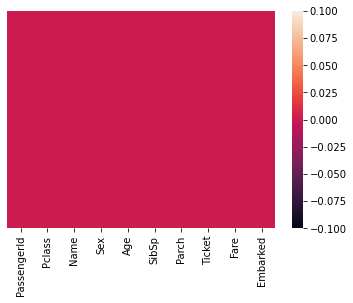

In [13]:
sns.heatmap(titanic.isnull(),yticklabels=False);

# Step 2: Converting Category data to numerical data

In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Name         417 non-null    object 
 3   Sex          417 non-null    object 
 4   Age          417 non-null    float64
 5   SibSp        417 non-null    int64  
 6   Parch        417 non-null    int64  
 7   Ticket       417 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     417 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 35.8+ KB


In [15]:
###Converting Age and Embarked Columns Categorical data into numerical data

In [16]:
Sex = pd.get_dummies(titanic['Sex'])
Sex.head()

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [17]:
Sex = pd.get_dummies(titanic['Sex'],drop_first = True)
Sex.head()

,male
0,1
1,0
2,1
3,1
4,0


In [18]:
Embark = pd.get_dummies(titanic['Embarked'],drop_first = True)
Embark.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [19]:
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [20]:
titanic.drop(['Sex','Embarked','Name','PassengerId','Ticket'],axis=1,inplace=True)

In [21]:
titanic.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,34.5,0,0,7.8292
1,3,47.0,1,0,7.0000
2,2,62.0,0,0,9.6875
3,3,27.0,0,0,8.6625
4,3,22.0,1,1,12.2875


In [22]:
titanic = pd.concat([titanic,Sex,Embark],axis=1)
titanic.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [23]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  417 non-null    int64  
 1   Age     417 non-null    float64
 2   SibSp   417 non-null    int64  
 3   Parch   417 non-null    int64  
 4   Fare    417 non-null    float64
 5   male    417 non-null    uint8  
 6   Q       417 non-null    uint8  
 7   S       417 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 20.8 KB


# Step 3: Visualize and Corelate the Dataset

In [24]:
###As our dataset was independent and was dependent on other variables so to find out any relation between and 2 variables 
#or more we have to convert our Object data into Numerical data.And now we can easily plot them and find some relation

In [25]:
titanic.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:59: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


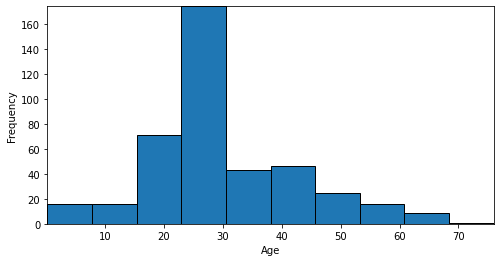

In [26]:
plt.figure(figsize=(8,4))
plt.xlabel('Age')
titanic['Age'].plot.hist(edgecolor='K').autoscale(enable=True,axis='both',tight=True);

In [27]:
titanic.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [28]:
#To find out relationship between Pclass and SibSp and now we can find out who are the  maximum and minimum no. of Pclass people
# with thier number of Siblings and Parents.Hence People with 0 SibSp are of Pclass=3 and maximum with 8 SibSp of 
#same Plcass=3 only.

#And we can find other relations too!

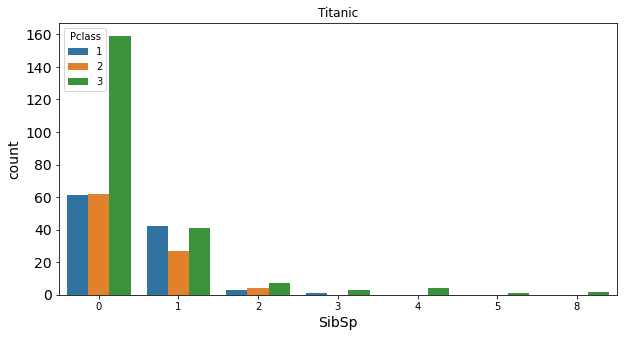

In [29]:
figure = plt.figure(figsize=(10,5));
plt.title('Titanic');
sns.countplot(x='SibSp',hue='Pclass',data=titanic);
plt.xlabel('SibSp',fontsize=14);
plt.ylabel('count',fontsize=14);
plt.yticks(fontsize=14);

In [30]:
# Here in line 72 we Can clearly depict the average age of all Pclass.
#Pclass1. has people with average people between 40-45
#Plcass2. has people with average people between 25-30
#Pclass3. has people with average people between 22-28
###Hence we can also find some Outliers in both Pclass2 and Plcass3

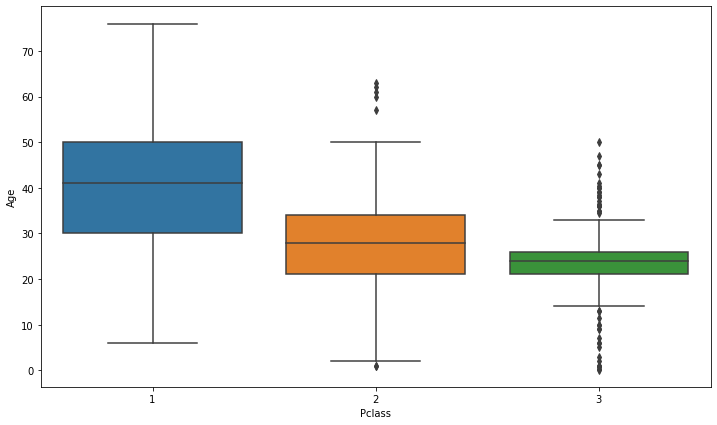

In [31]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data = titanic);